In [ ]:
#Mount Google Drive within Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Split the dataset into desired subset
import os, shutil, pathlib, random

new_base_dir = pathlib.Path("/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small")

original_train_dir = new_base_dir / "train"
subset_train_dir = new_base_dir / "train_subset"

original_validation_dir = new_base_dir / "validation"
subset_validation_dir = new_base_dir / "validation_subset"

original_test_dir = new_base_dir / "test"
subset_test_dir = new_base_dir / "test_subset"

# Eliminate exist subset dataset
if os.path.exists(subset_train_dir):
    shutil.rmtree(subset_train_dir)
if os.path.exists(subset_validation_dir):
    shutil.rmtree(subset_validation_dir)
if os.path.exists(subset_test_dir):
    shutil.rmtree(subset_test_dir)

# Create a new folder for each subsets
os.makedirs(subset_train_dir / "dogs", exist_ok=True)
os.makedirs(subset_train_dir / "cats", exist_ok=True)

os.makedirs(subset_validation_dir / "dogs", exist_ok=True)
os.makedirs(subset_validation_dir / "cats", exist_ok=True)

os.makedirs(subset_test_dir / "dogs", exist_ok=True)
os.makedirs(subset_test_dir / "cats", exist_ok=True)

# Link a path of each subsets to its original file
dog_dir_train = original_train_dir / "dogs"
cat_dir_train = original_train_dir / "cats"

dog_dir_validation = original_validation_dir / "dogs"
cat_dir_validation = original_validation_dir / "cats"

dog_dir_test = original_test_dir / "dogs"
cat_dir_test = original_test_dir / "cats"

# Randomly choose 500 data from each cats and dogs folder from the trainset
random_dogs_train = random.sample(os.listdir(dog_dir_train), 500)
random_cats_train = random.sample(os.listdir(cat_dir_train), 500)

# Randomly choose 250 data from each cats and dogs folder from the validationset
random_dogs_validation = random.sample(os.listdir(dog_dir_validation), 250)
random_cats_validation = random.sample(os.listdir(cat_dir_validation), 250)

# Randomly choose 250 data from each cats and dogs folder from the testset
random_dogs_test = random.sample(os.listdir(dog_dir_test), 250)
random_cats_test = random.sample(os.listdir(cat_dir_test), 250)

# Copy pictures to each folders above
#Training set
for fname in random_dogs_train:
    src = dog_dir_train / fname
    dst = subset_train_dir / "dogs" / fname
    shutil.copyfile(src, dst)

for fname in random_cats_train:
    src = cat_dir_train / fname
    dst = subset_train_dir / "cats" / fname
    shutil.copyfile(src, dst)

#Validation set
for fname in random_dogs_validation:
    src = dog_dir_validation / fname
    dst = subset_validation_dir / "dogs" / fname
    shutil.copyfile(src, dst)

for fname in random_cats_validation:
    src = cat_dir_validation / fname
    dst = subset_validation_dir / "cats" / fname
    shutil.copyfile(src, dst)

#Test set
for fname in random_dogs_test:
    src = dog_dir_test / fname
    dst = subset_test_dir / "dogs" / fname
    shutil.copyfile(src, dst)

for fname in random_cats_test:
    src = cat_dir_test / fname
    dst = subset_test_dir / "cats" / fname
    shutil.copyfile(src, dst)



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          12,545 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Configuring the model for training
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory=subset_train_dir,
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    directory=subset_validation_dir,
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    directory=subset_test_dir,
    image_size=(180, 180),
    batch_size=32
)


Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [ ]:
#Displaying the shapes of the data and labels yielded by the Dataset
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
#Fitting the model using a Dataset
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.5032 - loss: 0.7580 - val_accuracy: 0.5120 - val_loss: 0.6929
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.5311 - loss: 0.6933 - val_accuracy: 0.5020 - val_loss: 0.6906
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.4762 - loss: 0.7007 - val_accuracy: 0.5340 - val_loss: 0.6923
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - accuracy: 0.5677 - loss: 0.6928 - val_accuracy: 0.5520 - val_loss: 0.6918
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5978 - loss: 0.6845 - val_accuracy: 0.5540 - val_loss: 0.6794
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6223 - loss: 0.6848 - val_accuracy: 0.5280 - val_loss: 0.9344
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 135s 3s/step - accuracy: 0.6483 - loss: 0.6505 - val_accuracy: 0.5400 - val_loss: 1.0162
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.6819 - loss: 0.6125 - val_accuracy: 0.6320 - val

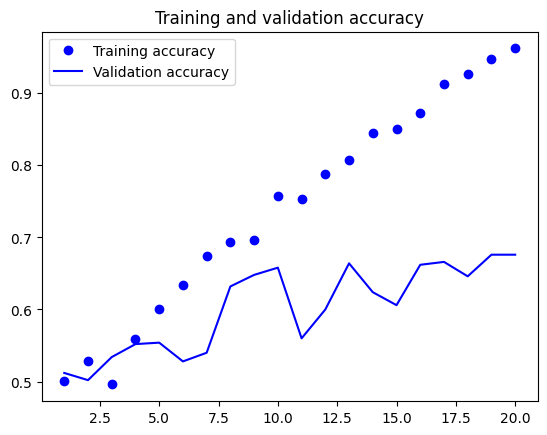

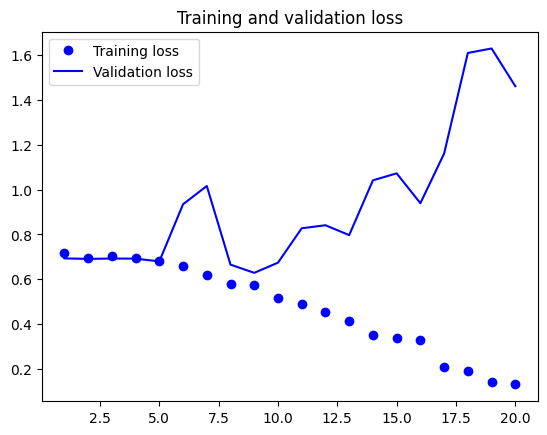

In [ ]:
#Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 753ms/step - accuracy: 0.6645 - loss: 0.6232
Test accuracy: 0.674


In [ ]:
#Using data augmentation
#Define a data augmentation stage to add to an image model
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

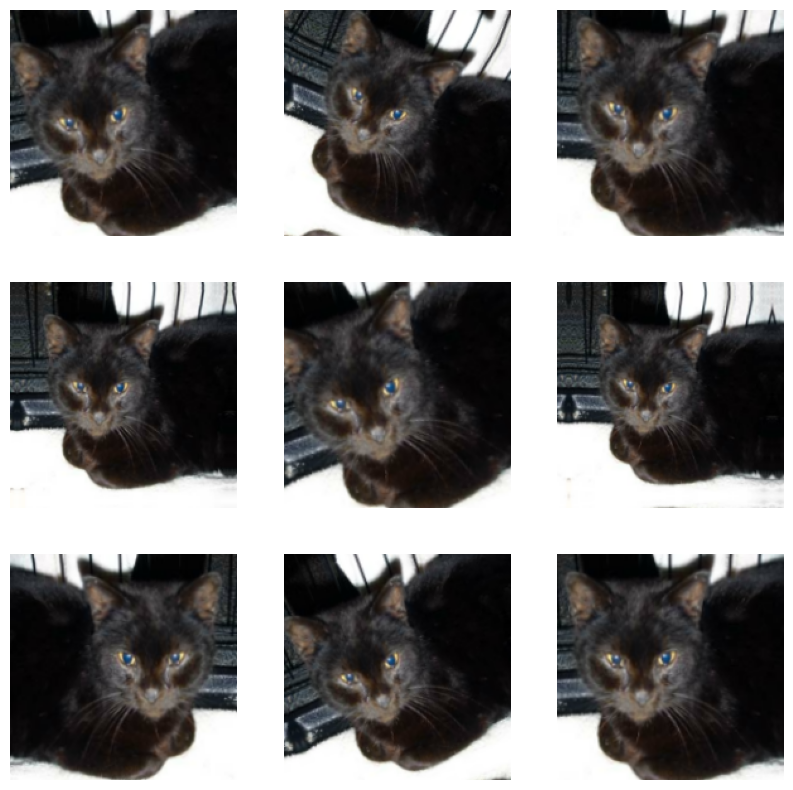

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
#Defining a new convnet that includes image augmentation and dropout
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
#Training the regularized convnet
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 103s 3s/step - accuracy: 0.4961 - loss: 0.7312 - val_accuracy: 0.5200 - val_loss: 0.6926
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 148s 3s/step - accuracy: 0.5272 - loss: 0.7204 - val_accuracy: 0.5100 - val_loss: 0.6927
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.5163 - loss: 0.6926 - val_accuracy: 0.4980 - val_loss: 0.6932
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.5026 - loss: 0.6926 - val_accuracy: 0.5760 - val_loss: 0.6922
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.5112 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - accuracy: 0.5246 - loss: 0.6906 - val_accuracy: 0.5320 - val_loss: 0.6890
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.5957 - loss: 0.6778 - val_accuracy: 0.6080 - val_loss: 0.6707
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.5981 - loss: 0.6640 - val_accuracy: 0.5200 - va

In [ ]:
#Evaluating the model on the test set
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 751ms/step - accuracy: 0.6319 - loss: 0.6544
Test accuracy: 0.628
